In [2]:
using DataFrames
Pkg.add("Gadfly")
using Gadfly

set_default_plot_size(20cm, 12cm)

INFO: Pkg operations are not possible on JuliaBox. Please use the "Packages" menu at the top of the main screen.


In [3]:
#Exercise2

In [4]:
df = readtable("CalculationTime.csv")
dfNaive = df[df[:Type] .== 0, :]
dfBetter = df[df[:Type] .== 1, :]
dfBLAS = df[df[:Type] .== 2, :]

,Type,MatrixRows,ClockTime
1,2,70,1249
2,2,140,9991
3,2,210,33749
4,2,280,81702
5,2,350,156507
6,2,420,274518
7,2,490,444566
8,2,560,666857
9,2,630,949501
10,2,700,1275413


In [5]:
#After adding type there occurs a problem with duplication
#=
    Q&A
        So why did I added type to DataFrame which makes so much troubles?
        - I did it to be able to specify each DataFrame later in layers.
            (In previous exercise I've got problems with it so now I wanted to prevent it)
=#   
dfMeanNaive = by(dfNaive, :MatrixRows, df -> DataFrame(Type = df[:Type], MeanClockTime = mean(df[:ClockTime]), AberrationClockTime = std(df[:ClockTime])))
dfMeanBetter = by(dfBetter, :MatrixRows, df -> DataFrame(Type = df[:Type], MeanClockTime = mean(df[:ClockTime]), AberrationClockTime = std(df[:ClockTime])))
dfMeanBLAS = by(dfBLAS, :MatrixRows, df -> DataFrame(Type = df[:Type], MeanClockTime = mean(df[:ClockTime]), AberrationClockTime = std(df[:ClockTime])))

,MatrixRows,Type,MeanClockTime,AberrationClockTime
1,70,2,1250.2,8.61265219184995
2,70,2,1250.2,8.61265219184995
3,70,2,1250.2,8.61265219184995
4,70,2,1250.2,8.61265219184995
5,70,2,1250.2,8.61265219184995
6,70,2,1250.2,8.61265219184995
7,70,2,1250.2,8.61265219184995
8,70,2,1250.2,8.61265219184995
9,70,2,1250.2,8.61265219184995
10,70,2,1250.2,8.61265219184995


In [6]:
#To solve problem with duplication I created function to deal with it
#Unfortunately it's specialized only for this exercise (has built-in column names and fixed column quantity)
#But it works

function eliminateDuplicats(df::DataFrame)
    dfIndex = find(.!nonunique(df::DataFrame))
    dfNoDup = DataFrame(MatrixRows = Int64[], Type = Int64[], MeanClockTime = Float64[], AberrationClockTime = Float64[])
    for i=1:size(dfIndex,1)
        push!(dfNoDup, [df[dfIndex[i],1] df[dfIndex[i],2] df[dfIndex[i],3] df[dfIndex[i],4]])
    end
    return dfNoDup
end

eliminateDuplicats (generic function with 1 method)

In [7]:
dfMeanNaive = eliminateDuplicats(dfMeanNaive)
dfMeanBetter = eliminateDuplicats(dfMeanBetter)
dfMeanBLAS = eliminateDuplicats(dfMeanBLAS)

,MatrixRows,Type,MeanClockTime,AberrationClockTime
1,70,2,1250.2,8.61265219184995
2,140,2,10068.9,164.31301429487155
3,210,2,34031.8,719.6312018434628
4,280,2,80898.5,1868.6109665857268
5,350,2,157887.4,2113.701713424421
6,420,2,273806.2,5075.608092742299
7,490,2,435272.9,4748.982544831168
8,560,2,656499.0,15551.637119966215
9,630,2,933817.9,8626.1084112259
10,700,2,1.2808432e6,12512.782404849495


In [8]:
#=
    Even after specifying type I wasn't able to pass it to layer.
    I tried to add new variable and connect it with type by "myType = :Type", but I've got only this:
        "WARNING: myType is not a recognized aesthetic. Ignoring."
    So, I'll do this same ugly method as previous.
=#
lNaive = layer(dfMeanNaive, x = :MatrixRows, y = :MeanClockTime, ymin = dfMeanNaive[:MeanClockTime]-dfMeanNaive[:AberrationClockTime], ymax = dfMeanNaive[:MeanClockTime] + dfMeanNaive[:AberrationClockTime], Geom.point, Geom.errorbar, Theme(default_color="blue"))
lBetter = layer(dfMeanBetter, x = :MatrixRows, y = :MeanClockTime, ymin = dfMeanBetter[:MeanClockTime]-dfMeanBetter[:AberrationClockTime], ymax = dfMeanBetter[:MeanClockTime] + dfMeanBetter[:AberrationClockTime], Geom.point, Geom.errorbar, Theme(default_color="orange"))
lBLAS = layer(dfMeanBLAS, x = :MatrixRows, y = :MeanClockTime, ymin = dfMeanBLAS[:MeanClockTime]-dfMeanBLAS[:AberrationClockTime], ymax = dfMeanBLAS[:MeanClockTime] + dfMeanBLAS[:AberrationClockTime], Geom.point, Geom.errorbar, Theme(default_color="red"))

2-element Array{Gadfly.Layer,1}:
 Gadfly.Layer(10×4 DataFrames.DataFrame
│ Row │ MatrixRows │ Type │ MeanClockTime │ AberrationClockTime │
├─────┼────────────┼──────┼───────────────┼─────────────────────┤
│ 1   │ 70         │ 2    │ 1250.2        │ 8.61265             │
│ 2   │ 140        │ 2    │ 10068.9       │ 164.313             │
│ 3   │ 210        │ 2    │ 34031.8       │ 719.631             │
│ 4   │ 280        │ 2    │ 80898.5       │ 1868.61             │
│ 5   │ 350        │ 2    │ 1.57887e5     │ 2113.7              │
│ 6   │ 420        │ 2    │ 2.73806e5     │ 5075.61             │
│ 7   │ 490        │ 2    │ 4.35273e5     │ 4748.98             │
│ 8   │ 560        │ 2    │ 656499.0      │ 15551.6             │
│ 9   │ 630        │ 2    │ 9.33818e5     │ 8626.11             │
│ 10  │ 700        │ 2    │ 1.28084e6     │ 12512.8             │, Dict{Symbol,Any}(Pair{Symbol,Any}(:y, :MeanClockTime),Pair{Symbol,Any}(:ymin, [1241.59, 9904.59, 33312.2, 79029.9, 1.55774e5, 2.68731e

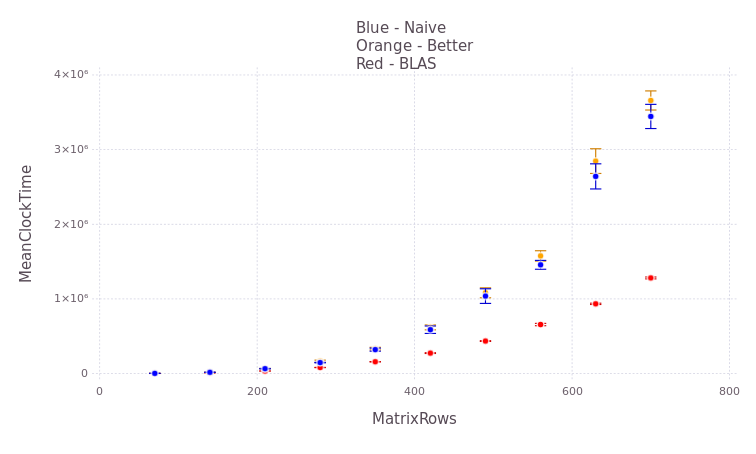

In [9]:
# Yes, it's ugly
plot(lNaive, lBetter, lBLAS, Guide.title("Blue - Naive\nOrange - Better\nRed - BLAS"))

In [ ]:
#=
    Funny thing
    Naive method is better than "Better" method
    BTW, in this exercise I used CPU clock time to express difference between functions execution.
    Recently I checked the value of CLOCKS_PER_SEC on my PC and it turned out to be 10^6, so the results should be
    divided by one million, thankfully MeanClockTime is expressed with exponenta = e^6, so the mantissa is simply
    equivalent to seconds.
=#